In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.000,T,0.021,USD,2.332,109809663.250,20040720,NaN,20040812,B,NaN,NaN,0.025
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.000,N,0.021,GBP,5.270,176008436.734,20040723,NaN,20040812,C,NaN,NaN,0.055
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.000,T,0.021,USD,2.332,56379532.960,20040723,NaN,20040817,A,NaN,NaN,0.025
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.000,T,0.021,USD,2.332,164508841.431,20040723,NaN,20040713,A,NaN,NaN,0.025
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.000,T,0.021,USD,2.332,140540156.866,20040723,NaN,20040713,B,NaN,NaN,0.025


In [4]:
test.head(5)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,PF00001001,DSK00001001,OFF00001001,A,20040720,171831000.000,T,0.021,USD,2.332,171533674.963,20040720,NaN,20040812,A,NaN,NaN
1,PF00001004,DSK00001003,OFF00001002,B,20040723,56485000.000,T,0.021,USD,2.332,56380383.067,20040723,NaN,20040719,B,NaN,NaN
2,PF00001009,DSK00001007,OFF00001001,A,20040607,41734000.000,T,0.021,USD,2.332,41661786.237,20040726,NaN,20040709,A,NaN,NaN
3,PF00001013,DSK00001011,OFF00001001,A,20040716,82951000.000,T,0.021,USD,2.332,82509362.905,20040726,NaN,20041019,A,NaN,NaN
4,PF00001014,DSK00001012,OFF00001001,A,20040713,73293000.000,T,0.021,USD,2.332,73170546.042,20040726,NaN,20040813,A,NaN,NaN


In [5]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['portfolio_id']
test_ID = test['portfolio_id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("portfolio_id", axis = 1, inplace = True)
test.drop("portfolio_id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (9366, 18) 
The test data size before dropping Id feature is : (4801, 17) 

The train data size after dropping Id feature is : (9366, 17) 
The test data size after dropping Id feature is : (4801, 16) 



 mu = 0.01 and sigma = 0.02



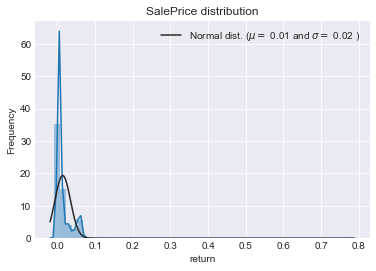

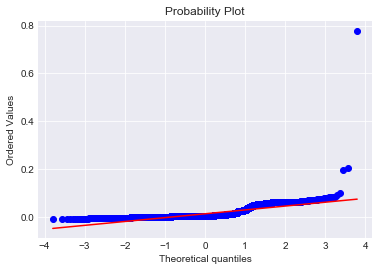

In [6]:
sns.distplot(train['return'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['return'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['return'], plot=plt)
plt.show()


 mu = 0.01 and sigma = 0.02



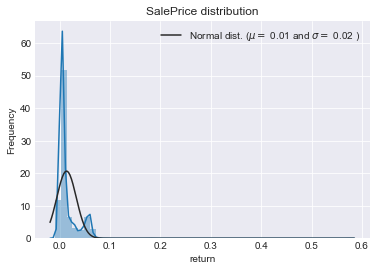

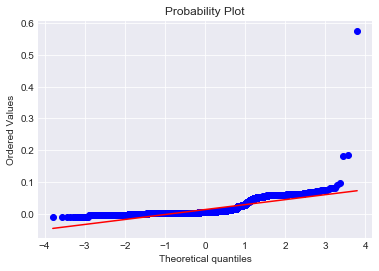

In [7]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["return"] = np.log1p(train["return"])

#Check the new distribution 
sns.distplot(train['return'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['return'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['return'], plot=plt)
plt.show()

In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['return'].values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['return'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (14167, 16)


In [9]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
hedge_value,60.366
indicator_code,60.352
desk_id,39.620
status,32.053
libor_rate,5.216
sold,0.014
bought,0.014


Text(0.5,1,'Percent missing data by feature')

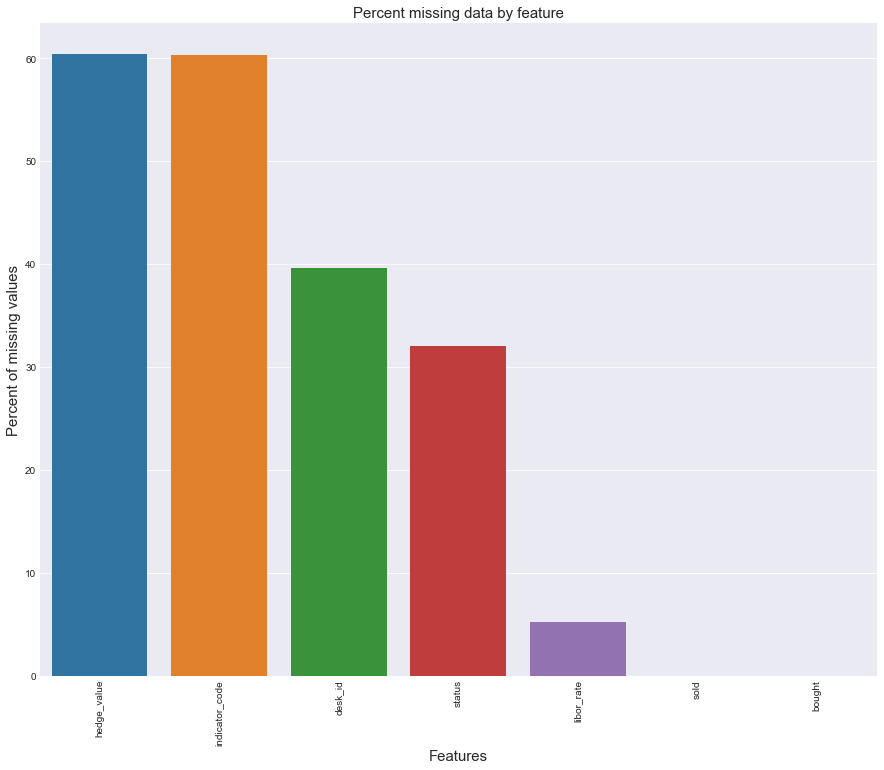

In [10]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

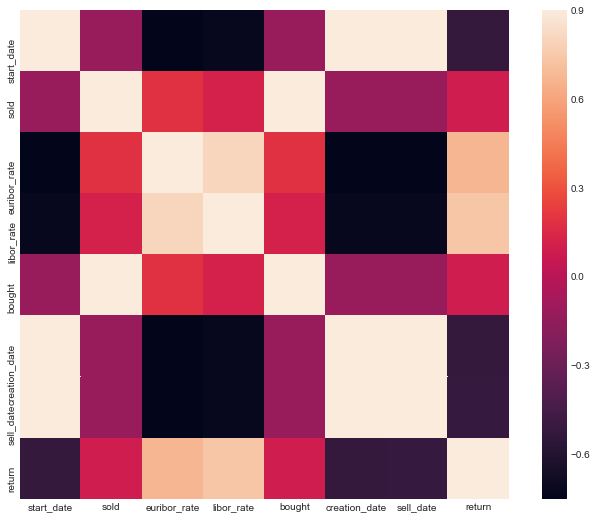

In [11]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [12]:
all_data["hedge_value"] = all_data["hedge_value"].fillna("None")

In [13]:
all_data["indicator_code"] = all_data["indicator_code"].fillna("None")

In [14]:
all_data["desk_id"] = all_data["desk_id"].fillna("None")

In [15]:
all_data["status"] = all_data["status"].fillna("None")

In [16]:
all_data["libor_rate"] = all_data["libor_rate"].fillna(0)

In [17]:
all_data["sold"] = all_data["status"].fillna(0)

In [18]:
all_data["bought"] = all_data["status"].fillna(0)

In [19]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [20]:
from sklearn.preprocessing import LabelEncoder
cols = ('desk_id','office_id','pf_category','start_date','country_code','currency','creation_date','indicator_code','sell_date','type','hedge_value','status')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (14167, 16)


In [21]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
libor_rate,1.799
euribor_rate,1.666
country_code,0.961
currency,0.586
indicator_code,0.423
hedge_value,0.086
creation_date,0.024
sell_date,0.013
start_date,-0.013
pf_category,-0.496


In [22]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 14 skewed numerical features to Box Cox transform


In [23]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(14167, 18)


In [24]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [25]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [26]:
train.head()

,country_code,creation_date,currency,desk_id,euribor_rate,hedge_value,indicator_code,libor_rate,office_id,pf_category,sell_date,start_date,status,type,bought_True,bought_None,sold_True,sold_None
0,1.194,0.000,1.820,0.000,0.021,0.730,0.000,1.319,0.730,0.730,2.440,3.238,0.000,0.730,0,1,0,1
1,0.730,0.730,1.194,0.730,0.021,0.730,0.000,2.113,0.000,0.000,2.440,2.603,0.000,1.194,0,1,0,1
2,1.194,0.730,1.820,1.541,0.021,0.730,0.000,1.319,0.000,0.000,2.886,3.341,0.000,0.000,0,1,0,1
3,1.194,0.730,1.820,1.820,0.021,0.730,0.000,1.319,0.000,0.000,0.730,1.820,0.000,0.000,0,1,0,1
4,1.194,0.730,1.820,1.820,0.021,0.730,0.000,1.319,0.730,0.730,0.730,1.820,0.000,0.730,0,1,0,1


In [27]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [28]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [29]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [30]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [31]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [32]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=7, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [33]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [34]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0134 (0.0085)



In [35]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0133 (0.0087)



In [36]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0130 (0.0161)



In [37]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0103 (0.0128)



In [38]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0135 (0.0119)



In [39]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.0107 (0.0123)



In [40]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [41]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0118 (0.0115)



In [42]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [43]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.0101 (0.0128)


In [44]:
from sklearn.metrics import r2_score
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(r2_score(y_train, stacked_train_pred))

0.872824920899


In [45]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(r2_score(y_train, xgb_train_pred))

0.757960790874


In [46]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(r2_score(y_train, lgb_train_pred))

0.870509540513


In [52]:
print('R2 score on train data:')
print(r2_score(y_train,stacked_train_pred*0.80 +
               xgb_train_pred*0.05 + lgb_train_pred*0.15 ))

R2 score on train data:
0.873267317246


In [53]:
ensemble = stacked_pred*0.80 + xgb_pred*0.05 + lgb_pred*0.15

In [54]:
sub = pd.DataFrame()
sub['portfolio_id'] = test_ID
sub['return'] = ensemble
sub.to_csv('submission1.csv',index=False)

In [50]:
sub.head()

,portfolio_id,return
0,PF00001001,0.026
1,PF00001004,0.026
2,PF00001009,0.025
3,PF00001013,0.024
4,PF00001014,0.024
